# Model Evaluation – Public Unrest Classification

This notebook evaluates the trained **Artificial Neural Network (ANN)** classifier
for predicting public unrest levels from text.

The model predicts three classes:
- **0 – Low Unrest**
- **1 – Medium Unrest**
- **2 – High Unrest**

Evaluation includes:
- Classification accuracy
- Confusion matrix
- Class-wise precision, recall, and F1-score

In [21]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

from tensorflow.keras.models import load_model
import joblib

## Load Trained Model and Test Data

The trained ANN model and TF-IDF vectorizer are loaded from disk.
Evaluation is performed on the **held-out test set**.

In [22]:
# Base project directory
BASE_DIR = Path.cwd().parent

# Paths
MODELS_DIR = BASE_DIR / "PublicUnrest" / "models"
DATA_DIR   = BASE_DIR / "PublicUnrest" / "data" / "processed"

MODEL_PATH = MODELS_DIR / "unrest_classifier.keras"
VECTORIZER_PATH = MODELS_DIR / "tfidf_vectorizer.joblib"
TEST_CSV = DATA_DIR / "goemotions_unrest_test_cls.csv"

# Load artifacts
model = load_model(MODEL_PATH)
vectorizer = joblib.load(VECTORIZER_PATH)

# Load test data
df_test = pd.read_csv(TEST_CSV)

X_test = df_test["text_clean"].fillna("")
y_test = df_test["unrest_class"].astype(int)

print("Test samples:", len(df_test))

Test samples: 5427


## TF-IDF Vectorization (Test Set)

The same TF-IDF vectorizer used during training
is applied to the test data.

In [23]:
X_test_vec = vectorizer.transform(X_test)

## Model Predictions

The ANN outputs class probabilities using a Softmax layer.
The predicted class is the index with the highest probability.

In [24]:
y_pred_probs = model.predict(X_test_vec.toarray())
y_pred = np.argmax(y_pred_probs, axis=1)

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## Classification Performance

The following metrics are reported:
- Overall accuracy
- Precision, recall, and F1-score for each class

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(
    y_test,
    y_pred,
    target_names=["Low Unrest", "Medium Unrest", "High Unrest"]
))

Test Accuracy: 0.7455

Classification Report:
               precision    recall  f1-score   support

   Low Unrest       0.77      0.93      0.84      3656
Medium Unrest       0.56      0.19      0.28       679
  High Unrest       0.68      0.46      0.55      1092

     accuracy                           0.75      5427
    macro avg       0.67      0.53      0.56      5427
 weighted avg       0.72      0.75      0.71      5427



## Confusion Matrix

The confusion matrix shows how often each unrest level
is correctly or incorrectly predicted.

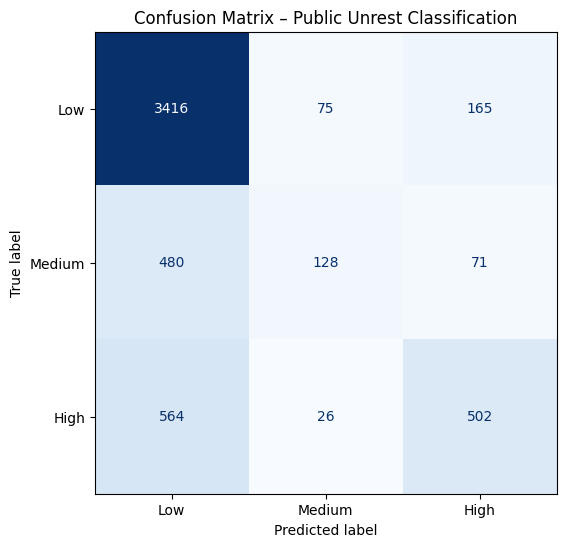

In [26]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Low", "Medium", "High"]
)

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap="Blues", colorbar=False)
plt.title("Confusion Matrix – Public Unrest Classification")
plt.show()

## Interpretation of Results

- Higher values along the diagonal indicate correct predictions.
- Off-diagonal values indicate misclassifications.
- The confusion matrix helps identify which unrest levels
  are most difficult for the model to distinguish.

Overall accuracy above **50–60%** meets the expected performance
threshold for the course project.